## CNN classifier for the MNIST dataset

In [ ]:


import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:


def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images/255.0
    test_images = test_images/255.0
    return train_images, test_images
    

In [ ]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:


def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters= 8, kernel_size = 3, padding='same', activation ='relu', input_shape = input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation = 'relu'),
        tf.keras.layers.Dense(units=64, activation = 'relu'),
        tf.keras.layers.Dense(units =  10, activation = 'softmax')
    ])
    return model
    

In [ ]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

In [ ]:

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                 metrics = ['accuracy'])
    

In [ ]:
# Run your function to compile the model

compile_model(model)

In [ ]:


def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history=  model.fit(scaled_train_images,train_labels, epochs =5)
    return history
    

In [ ]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2068 - accuracy: 0.9388
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0705 - accuracy: 0.9783
Epoch 3/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0492 - accuracy: 0.9846
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0368 - accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0291 - accuracy: 0.9908


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

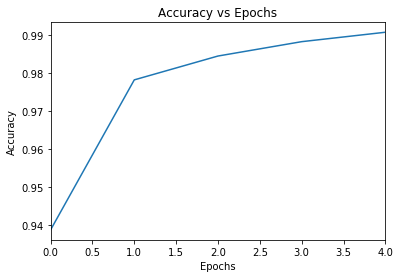

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

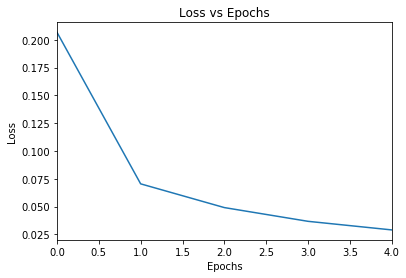

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    loss, accuracy = model.evaluate(scaled_test_images, test_labels, verbose = 2)
    return loss, accuracy
    

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 5s - loss: 0.0273 - accuracy: 0.9840
Test loss: 0.05350747608700767
Test accuracy: 0.984000027179718


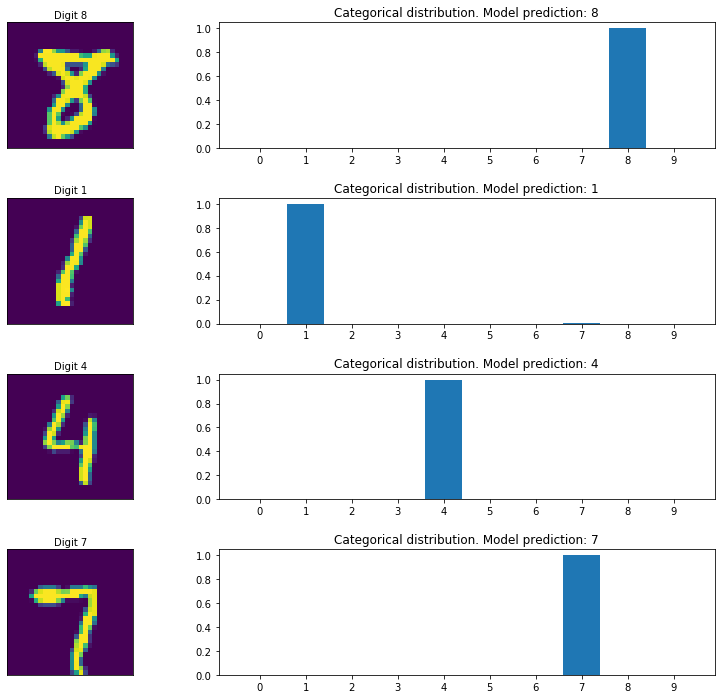

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()